[INFO]  Generating synthetic signal data...
[INFO]  Simulating signal loss...
[INFO]  Performing KNN imputation...
[INFO]  Evaluating prediction accuracy...
[INFO] Mean Squared Error on predicted missing values: 0.192048
[INFO]  Visualizing results...


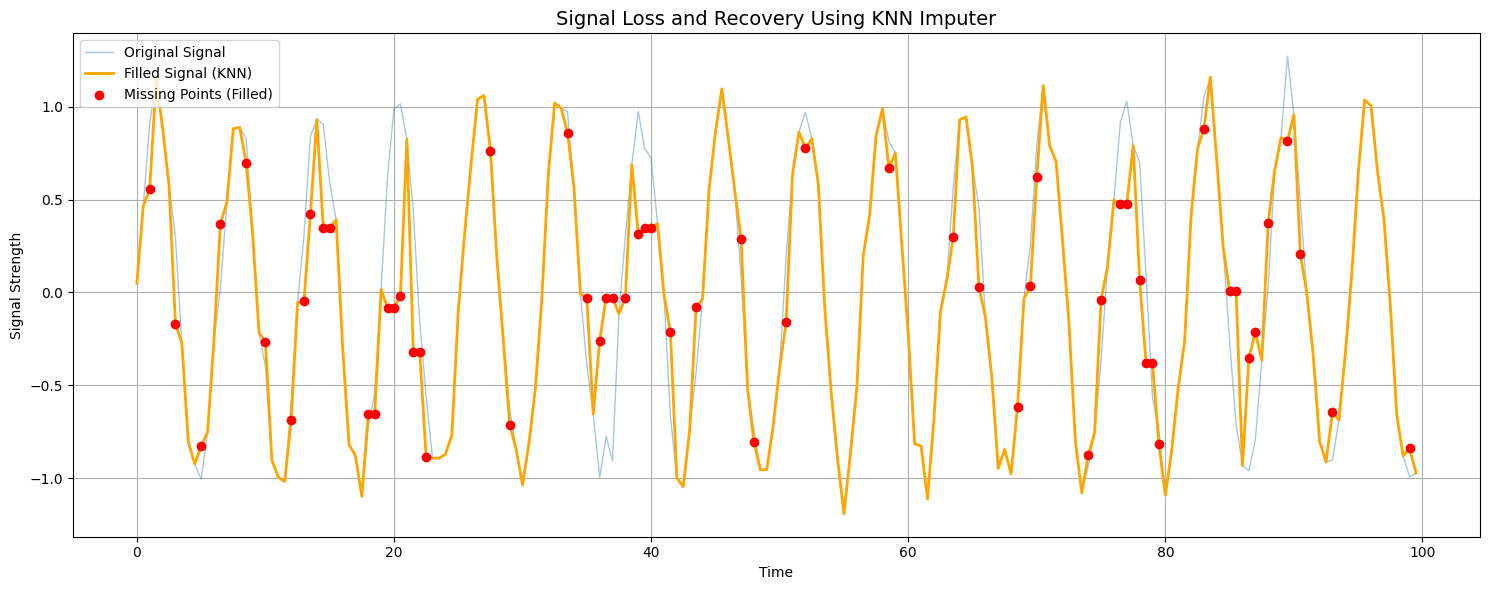

In [1]:
"""
Missing Signal Prediction in Time-Series Data
Author:nitya,kathan,niket
Description:
    Simulates signal drops (e.g., in space/NASA data) and uses KNN imputation to fill missing values.
    Clearly visualizes where values were missing and how they were predicted.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import logging

# Set up logger
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')

# ----------------------------------------------------------
# Step 1: Generate synthetic time-series signal data
# ----------------------------------------------------------
def generate_signal_data(seed: int = 42) -> pd.DataFrame:
    """
    Generate synthetic sine wave signal data with noise.
    Returns:
        DataFrame with 'Time' and 'Signal'
    """
    np.random.seed(seed)
    time = np.arange(0, 100, 0.5)
    signal = np.sin(time) + np.random.normal(0, 0.1, len(time))
    return pd.DataFrame({'Time': time, 'Signal': signal})

# ----------------------------------------------------------
# Step 2: Simulate missing signal points
# ----------------------------------------------------------
def simulate_missing_signal(data: pd.DataFrame, missing_rate: float = 0.3) -> pd.DataFrame:
    """
    Randomly set some signal values to NaN to simulate signal loss.
    Args:
        data: Original DataFrame
        missing_rate: Proportion of missing values
    Returns:
        DataFrame with NaN values simulating signal loss
    """
    data_with_missing = data.copy()
    n_missing = int(len(data) * missing_rate)
    missing_indices = np.random.choice(data.index, n_missing, replace=False)
    data_with_missing.loc[missing_indices, 'Signal'] = np.nan
    return data_with_missing

# ----------------------------------------------------------
# Step 3: Impute missing values using KNN
# ----------------------------------------------------------
def knn_impute_signal(data_with_missing: pd.DataFrame, neighbors: int = 3) -> pd.DataFrame:
    """
    Fill missing signal values using KNN imputation.
    Args:
        data_with_missing: DataFrame with NaN values
        neighbors: K for KNN
    Returns:
        DataFrame with missing values filled
    """
    imputer = KNNImputer(n_neighbors=neighbors)
    imputed_array = imputer.fit_transform(data_with_missing)
    return pd.DataFrame(imputed_array, columns=data_with_missing.columns)

# ----------------------------------------------------------
# Step 4: Evaluate imputation performance
# ----------------------------------------------------------
def evaluate_imputation(original: pd.DataFrame, filled: pd.DataFrame, missing_mask: pd.Series):
    """
    Calculate MSE between original and filled signal at missing positions.
    """
    mse = mean_squared_error(original['Signal'][missing_mask], filled['Signal'][missing_mask])
    logging.info(f"Mean Squared Error on predicted missing values: {mse:.6f}")

# ----------------------------------------------------------
# Step 5: Visualize all signals
# ----------------------------------------------------------
def plot_signals(original: pd.DataFrame, missing: pd.DataFrame, filled: pd.DataFrame):
    """
    Show original, missing (highlighted), and filled signals on one plot.
    """
    missing_mask = missing['Signal'].isna()

    plt.figure(figsize=(15, 6))

    # Plot original signal (faded)
    plt.plot(original['Time'], original['Signal'], label='Original Signal', alpha=0.4, linewidth=1)

    # Plot filled signal
    plt.plot(filled['Time'], filled['Signal'], label='Filled Signal (KNN)', linewidth=2, color='orange')

    # Highlight missing points
    plt.scatter(filled['Time'][missing_mask],
                filled['Signal'][missing_mask],
                color='red', label='Missing Points (Filled)', zorder=5)

    # Formatting
    plt.title("Signal Loss and Recovery Using KNN Imputer", fontsize=14)
    plt.xlabel("Time")
    plt.ylabel("Signal Strength")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----------------------------------------------------------
# Main Function
# ----------------------------------------------------------
def main():
    logging.info(" Generating synthetic signal data...")
    original_data = generate_signal_data()

    logging.info(" Simulating signal loss...")
    data_with_missing = simulate_missing_signal(original_data, missing_rate=0.3)

    logging.info(" Performing KNN imputation...")
    filled_data = knn_impute_signal(data_with_missing, neighbors=3)

    logging.info(" Evaluating prediction accuracy...")
    missing_mask = data_with_missing['Signal'].isna()
    evaluate_imputation(original_data, filled_data, missing_mask)

    logging.info(" Visualizing results...")
    plot_signals(original_data, data_with_missing, filled_data)

# Run script
if __name__ == "__main__":
    main()
